In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import plotly
plotly.offline.init_notebook_mode(connected = True) #so that it plots locally

In [51]:
customer_data = pd.read_csv('DataSet/train.csv', index_col='customer_id')
customer_data.head()

,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
customer_id,,,,,,,,,,,,,,,,,,
CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [8]:
customer_data.columns

Index(['name', 'age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
       'net_yearly_income', 'no_of_days_employed', 'occupation_type',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'credit_card_default'],
      dtype='object')

In [28]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45528 entries, CST_115179 to CST_160078
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     45528 non-null  object 
 1   age                      45528 non-null  int64  
 2   gender                   45528 non-null  object 
 3   owns_car                 44981 non-null  object 
 4   owns_house               45528 non-null  object 
 5   no_of_children           44754 non-null  float64
 6   net_yearly_income        45528 non-null  float64
 7   no_of_days_employed      45065 non-null  float64
 8   occupation_type          45528 non-null  object 
 9   total_family_members     45445 non-null  float64
 10  migrant_worker           45441 non-null  float64
 11  yearly_debt_payments     45433 non-null  float64
 12  credit_limit             45528 non-null  float64
 13  credit_limit_used(%)     45528 non-null  int64  
 14  credit_score 

In [37]:
numeric_col=customer_data.select_dtypes('number')
categorical_col=customer_data.select_dtypes(exclude=["number"])

In [142]:
numeric_col.isna().sum()

age                          0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [38]:
#cleaning
categorical_col.isna().sum()

name                 0
gender               0
owns_car           547
owns_house           0
occupation_type      0
dtype: int64

In [81]:
#from plotly.graph_objs import Figure, Bar, Layout
import plotly.express as plt

###############################
# country_df = country_df.groupby('country')['imdb_score'].median().sort_values(ascending = False).reset_index()

# data = [Bar(x = country_df['country'], y = country_df['imdb_score'], text = country_df['country'])]
# layout = Layout(title = "Countries with Highest Median Imdb Score")

# fig = Figure(data = data, layout = layout)

# plotly.offline.iplot(fig,show_link = False)
# ###############################


customer_data_copy=customer_data.copy()
customer_data_copy['gender']=customer_data_copy['gender'].replace("XNA", np.nan)

gndr_df = customer_data_copy.groupby('gender')['credit_card_default'].count().sort_values(ascending = False).reset_index()
print(gndr_df)
# data = [Bar(x = gndr_df['gender'], y = gndr_df['credit_card_default'], text = gndr_df['gender'])]
# layout = Layout(title = "Gender with Highest Median Imdb Score")

# fig2 = Figure(data = gndr_df, layout = layout)

# plotly.offline.iplot(fig2,show_link = False)

fig = plt.bar(x = gndr_df['gender'], y = gndr_df['credit_card_default'])
fig.show()





  gender  credit_card_default
0      F                29957
1      M                15570


In [87]:
temp=customer_data_copy.loc[customer_data_copy['credit_card_default']==1]
gndr_df2 = temp.groupby('gender')['credit_card_default'].count().sort_values(ascending = False).reset_index()
print(gndr_df2)
fig2 = plt.bar(x = gndr_df2['gender'], y = gndr_df2['credit_card_default'])
fig2.show()


  gender  credit_card_default
0      F                 2093
1      M                 1604


In [100]:
temp3=pd.merge(gndr_df, gndr_df2, how='inner', on ='gender')
temp3['avg']=(temp3['credit_card_default_y']/temp3['credit_card_default_x'])*100

gndr_per_fig = plt.bar(x = temp3['gender'], y = temp3['avg'], labels={'x': 'Gender', 'y':'Credit card default %'})
gndr_per_fig.show()

In [115]:
customer_data_copy=customer_data.copy()
#customer_data_copy['occupation_type']=customer_data_copy['gender'].replace("XNA", np.nan)

occ_df = customer_data_copy.groupby('occupation_type')['credit_card_default'].count().sort_values(ascending = False).reset_index()
occ_fig = plt.bar(x = occ_df['occupation_type'], y = occ_df['credit_card_default'])
occ_fig.show()


In [126]:
temp4=customer_data_copy.loc[customer_data_copy['credit_card_default']==1]
occ_df2 = temp4.groupby('occupation_type')['credit_card_default'].count().sort_values(ascending = False).reset_index()
print(occ_df2)
occ_fig2 = plt.bar(x = occ_df2['occupation_type'], y = occ_df2['credit_card_default'])
occ_fig2.show()
temp5=pd.merge(occ_df, occ_df2, how='inner', on ='occupation_type')
temp5
temp5['per']=(temp5['credit_card_default_y']/temp5['credit_card_default_x'])*100
temp5=temp5.sort_values(by='per', ascending = False)

occ_per_fig = plt.bar(x = temp5['occupation_type'], y = temp5['per'], labels={'x': 'occupation_type', 'y':'Credit card default %'})
occ_per_fig.show()


          occupation_type  credit_card_default
0                 Unknown                  918
1                Laborers                  851
2             Sales staff                  458
3                 Drivers                  321
4              Core staff                  243
5                Managers                  214
6   High skill tech staff                  107
7          Security staff                  106
8           Cooking staff                  103
9          Medicine staff                   99
10            Accountants                   78
11         Cleaning staff                   69
12     Low-skill Laborers                   53
13  Private service staff                   29
14   Waiters/barmen staff                   21
15          Realty agents                   10
16            Secretaries                    8
17               HR staff                    7
18               IT staff                    2


In [141]:
customer_data_copy2=customer_data.copy()
customer_data_copy2 = customer_data_copy2.dropna()

car_df = customer_data_copy2.groupby('owns_car')['credit_card_default'].count().sort_values(ascending = False).reset_index()
print(car_df)

house_df = customer_data_copy2.groupby('owns_house')['credit_card_default'].count().sort_values(ascending = False).reset_index()
print(house_df)




temp_car1=customer_data_copy2.loc[customer_data_copy2['credit_card_default']==1]
car_df2 = temp_car1.groupby('owns_car')['credit_card_default'].count().sort_values(ascending = False).reset_index()
print(car_df2)

#temp_house1=customer_data_copy2.loc[customer_data_copy2['credit_card_default']==1]
house_df2 = temp_car1.groupby('owns_house')['credit_card_default'].count().sort_values(ascending = False).reset_index()
print(house_df2)

# occ_fig2 = plt.bar(x = occ_df2['occupation_type'], y = occ_df2['credit_card_default'])
# occ_fig2.show()
temp5=pd.merge(car_df, car_df2, how='inner', on ='owns_car')
# temp5
# temp5['per']=(temp5['credit_card_default_y']/temp5['credit_card_default_x'])*100
# temp5=temp5.sort_values(by='per', ascending = False)

# occ_per_fig = plt.bar(x = temp5['occupation_type'], y = temp5['per'], labels={'x': 'occupation_type', 'y':'Credit card default %'})
# occ_per_fig.show()


  owns_car  credit_card_default
0        N                28758
1        Y                14751
  owns_house  credit_card_default
0          Y                30255
1          N                13254
  owns_car  credit_card_default
0        N                 2436
1        Y                 1095
  owns_house  credit_card_default
0          Y                 2436
1          N                 1095


In [11]:
corr_matrix = customer_data.corr(method ='pearson')
corr_matrix

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
age,1.000000,-0.009082,0.004079,0.000506,-0.010640,-0.005519,-0.002453,0.004473,-0.005529,0.000817,0.001393,-0.001406,-0.000983
no_of_children,-0.009082,1.000000,0.008939,-0.243088,0.880278,0.070673,0.028706,0.009354,0.007487,-0.014673,0.019528,0.021620,0.023689
net_yearly_income,0.004079,0.008939,1.000000,-0.029367,0.010432,0.001478,0.076958,0.993378,0.002696,-0.009688,-0.004696,0.015092,0.011508
no_of_days_employed,0.000506,-0.243088,-0.029367,1.000000,-0.229344,-0.219521,-0.104545,-0.027745,-0.018720,0.035533,-0.036232,-0.034295,-0.047043
total_family_members,-0.010640,0.880278,0.010432,-0.229344,1.000000,0.080634,0.078669,0.010251,0.001928,-0.011524,0.010608,0.013411,0.010754
migrant_worker,-0.005519,0.070673,0.001478,-0.219521,0.080634,1.000000,0.014170,-0.000110,0.010198,-0.013319,0.029202,0.029964,0.034013
yearly_debt_payments,-0.002453,0.028706,0.076958,-0.104545,0.078669,0.014170,1.000000,0.075169,-0.006850,0.005756,-0.012738,-0.011619,-0.013089
credit_limit,0.004473,0.009354,0.993378,-0.027745,0.010251,-0.000110,0.075169,1.000000,0.003109,-0.009685,-0.004302,0.015759,0.012250
credit_limit_used(%),-0.005529,0.007487,0.002696,-0.018720,0.001928,0.010198,-0.006850,0.003109,1.000000,-0.174420,0.252505,0.253684,0.326641
credit_score,0.000817,-0.014673,-0.009688,0.035533,-0.011524,-0.013319,0.005756,-0.009685,-0.174420,1.000000,-0.471421,-0.450712,-0.543164


In [23]:

fig = plt.imshow(corr_matrix, text_auto=True, aspect="auto")
fig.show()

<AxesSubplot:>

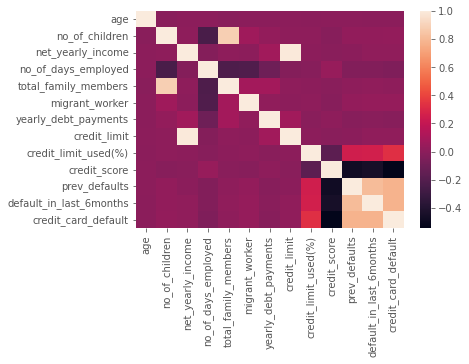

In [21]:
import seaborn as sns
sns.heatmap(corr_matrix)